### Problem:
- In this project, we aim to build a predictive model to determine whether a hotel booking would be canceled, which is crucial for hotels as cancellations affect revenue and operational planning. The dataset contains a high number of features related to booking, such as lead time, deposit type, and special requests, which adds to the complexity of the model. The challenge lies in the data preprocessing steps, which include feature selection and engineering, handling missing values, and noise in the data. Additionally, we are going to train different models, evaluate their performance using the right metrics, and interpret the model by analyzing the most important features in the context of hotel booking cancellations.

## Objectives

### 1. Explore the Dataset
- Investigate the dataset's basic information.
- Analyze summary statistics for numerical and categorical variables.

### 2. Preprocessing Steps
- Select and engineer features.
- Handle missing values.
- Handle noisy data.
- Encode categorical variables.

### 3. Model Building
- Implement and tune classification models including **Decision Trees**, **Random Forest**, and **XGBoost**.
- Emphasize achieving high **F1-score** for class 1, ensuring comprehensive identification of booking cancellations.

### 4. Evaluate and Compare Model Performance
- Utilize **accuracy**, **precision**, **recall**, **F1-score**, and **AUC** to gauge the models' effectiveness.

### 5. Analyze Feature Importance
- Understand which features have the most influence on the predictions.


## Step 1 | Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': 'lavender'}, style='darkgrid')

## Step 2 | Read Dataset

let's load the dataset into a dataframe

In [2]:
df = pd.read_csv("hotel_booking.csv")
df.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


| Index | Variable                        | Description                                                                 |
|-------|----------------------------------|-----------------------------------------------------------------------------|
| 1     | hotel                           | Type of hotel (Resort Hotel, City Hotel)                                    |
| 2     | is_canceled                     | Reservation cancellation status (0 = not canceled, 1 = canceled)            |
| 3     | lead_time                       | Number of days between booking and arrival                                  |
| 4     | arrival_date_year               | Year of arrival                                                             |
| 5     | arrival_date_month              | Month of arrival                                                            |
| 6     | arrival_date_week_number        | Week number of the year for arrival                                         |
| 7     | arrival_date_day_of_month       | Day of the month of arrival                                                 |
| 8     | stays_in_weekend_nights         | Number of weekend nights (Saturday and Sunday) the guest stayed or booked   |
| 9     | stays_in_week_nights            | Number of week nights the guest stayed or booked                            |
| 10    | adults                          | Number of adults                                                            |
| 11    | children                        | Number of children                                                          |
| 12    | babies                          | Number of babies                                                            |
| 13    | meal                            | Type of meal booked (BB, FB, HB, SC, Undefined)                             |
| 14    | country                         | Country of origin of the guest                                              |
| 15    | market_segment                  | Market segment designation                                                  |
| 16    | distribution_channel            | Booking distribution channel                                                |
| 17    | is_repeated_guest               | If the guest is a repeat customer (0 = not repeated, 1 = repeated)          |
| 18    | previous_cancellations          | Number of previous bookings that were canceled by the customer              |
| 19    | previous_bookings_not_canceled  | Number of previous bookings that were not canceled by the customer          |
| 20    | reserved_room_type              | Type of reserved room                                                       |
| 21    | assigned_room_type              | Type of assigned room                                                       |
| 22    | booking_changes                 | Number of changes made to the booking                                       |
| 23    | deposit_type                    | Type of deposit made (No Deposit, Refundable, Non Refund)                   |
| 24    | agent                           | ID of the travel agent responsible for the booking                          |
| 25    | company                         | ID of the company responsible for the booking                               |
| 26    | days_in_waiting_list            | Number of days the booking was in the waiting list                          |
| 27    | customer_type                   | Type of customer (Transient, Contract, Transient-Party, Group)              |
| 28    | adr                             | Average Daily Rate                                                          |
| 29    | required_car_parking_spaces     | Number of car parking spaces required                                       |
| 30    | total_of_special_requests       | Number of special requests made                                             |
| 31    | reservation_status              | Last reservation status (Check-Out, Canceled, No-Show)                      |
| 32    | reservation_status_date         | Date of the last reservation status                                         |
| 33    | name                            | Guest's name                                                                |
| 34    | email                           | Guest's email address                                                       |
| 35    | phone-number                    | Guest's phone number                                                        |
| 36    | credit_card                     | Last four digits of the guest's credit card                                 |


## Step 3 | Dataset Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
print(df.columns.tolist())
print(f"The total number of the rows in the data is {df.shape[0]}")
print(f"The total number of the columns in the data is {df.shape[1]}")
print(f"The total number of the missing values in the data is {df.isnull().sum().sum()}")
print(f"The total number of the duplicated rows in the data is {df.duplicated().sum()}")

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card']
The total number of the rows in the data is 119390
The total number of the columns in the data is 36
The total number of the missing values in the data is 129425
The total number of the duplicated rows in the data is 0


In [5]:
# getting the number of missing values in each column
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
integer_columns = df.select_dtypes(include=["int64"]).columns.tolist()
float_columns = df.select_dtypes(include=["float64"]).columns.tolist()
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()
print(f"The total number of Integer columns is {len(integer_columns)}")
print(integer_columns)
print("="*200)
print(f"The total number of Float columns is {len(float_columns)}")
print(float_columns)
print("="*200)
print(f"The total number of the Categorical columns is {len(categorical_columns)}")
print(categorical_columns)

The total number of Integer columns is 16
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']
The total number of Float columns is 4
['children', 'agent', 'company', 'adr']
The total number of the Categorical columns is 16
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card']


### Inferences:

- **Number of Entries**: The dataset consists of **119,390** entries.

- **Columns**: The dataset contains **36 columns**, which represent various attributes related to hotel bookings.

- **Data Types**:
  - A majority of the columns, **16** to be precise, are of the **object** data type (often representing strings or categorical data).
  - **16** columns are of the **int64** data type, representing integer values.
  - **4** columns are of the **float64** data type, which typically denotes decimal values.

- **Missing Values**:
  - The column **children** has **4 missing values**.
  - The column **country** has **488 missing values**.
  - The column **agent** has **16,340 missing values**.
  - The column **company** has a significant number of missing values, totaling **112,593**.

These missing values might need addressing, depending on the context of the analysis or the model we intend to build.


### Note:
Based on the data types and the feature explanations provided earlier, we identified that 20 columns (`hotel`, `is_canceled`, `arrival_date_year`, `arrival_date_month`, `meal`, `country`, `market_segment`, `distribution_channel`, `is_repeated_guest`, `reserved_room_type`, `assigned_room_type`, `deposit_type`, `agent`, `company`, `customer_type`, `reservation_status`, `name`, `email`, `phone-number` and `credit_card`) are categorical in terms of their semantics. These features must have string (object) data type to ensure proper analysis and interpretation in subsequent steps:

In [7]:
# Based on the given dataset description, list the columns that are categorical in terms of their semantics
categorical_columns_semantics = [
    'hotel',
    'is_canceled',
    'arrival_date_year',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'is_repeated_guest',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'company',
    'customer_type',
    'reservation_status',
    'name',
    'email',
    'phone-number',
    'credit_card'
]
# Convert these columns to string (object) data type
for column in categorical_columns_semantics:
        df[column] = df[column].astype(str)
# Verify the changes in data types
df.dtypes

hotel                              object
is_canceled                        object
lead_time                           int64
arrival_date_year                  object
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
integer_columns = df.select_dtypes(include=["int64"]).columns.tolist()
float_columns = df.select_dtypes(include=["float64"]).columns.tolist()
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()
print(f"The total number of Integer columns is {len(integer_columns)}")
print(integer_columns)
print("="*200)
print(f"The total number of Float columns is {len(float_columns)}")
print(float_columns)
print("="*200)
print(f"The total number of the Categorical columns is {len(categorical_columns)}")
print(categorical_columns)

The total number of Integer columns is 13
['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']
The total number of Float columns is 2
['children', 'adr']
The total number of the Categorical columns is 21
['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card']


### Step 3.2 | Summary Statistics for Numerical Variables

Let's explore the summary statistics of our numeric variables:

In [9]:
# Get the summary statistics for numerical variables
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.00,0.000,0.0,26.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.00,0.000,0.0,72.0


### Numerical Variables:
- **`lead_time`**: The average time between booking and arrival is approximately 104 days, ranging from 0 to 737 days.
- **`arrival_date_week_number`**: The average week number of the year for arrival is approximately 27.17, ranging from 1 to 53.
- **`arrival_date_day_of_month`**: The average day of the month of arrival is approximately 15.80, ranging from 1 to 31.
- **`stays_in_weekend_nights`**: On average, guests stay for around 0.93 weekend nights, with some guests staying for as long as 19 weekend nights.
- **`stays_in_week_nights`**: On average, guests stay for about 2.5 week nights, with stays ranging from 0 to 50 week nights.
- **`adults`**: The average number of adults per booking is approximately 1.86, with a range from 0 to 55 adults.
- **`children`**: On average, there are about 0.1 children per booking, with a maximum of 10 children in some bookings.
- **`babies`**: The average number of babies per booking is very low, approximately 0.008, with a maximum of 10 babies in some bookings.
- **`previous_cancellations`**: On average, guests have canceled about 0.09 times in the past, with some guests having as many as 26 previous cancellations.
- **`previous_bookings_not_canceled`**: On average, guests have not canceled about 0.14 bookings in the past, with some guests having as many as 72 previous bookings that they didn't cancel.
- **`booking_changes`**: Bookings are changed on average about 0.22 times, with some bookings being changed up to 21 times.
- **`days_in_waiting_list`**: The average time a booking spends on the waiting list is approximately 2.32 days, with some bookings waiting for as long as 391 days.
- **`adr`**: The Average Daily Rate is about 101.83, with rates ranging from -6.38 (which might indicate errors or special cases) to 5400.
- **`required_car_parking_spaces`**: On average, guests require about 0.06 parking spaces, with some bookings requiring up to 8 spaces.
- **`total_of_special_requests`**: On average, guests make about 0.57 special requests, with some making up to 5 requests.

### Noisy Data Features

Based on the descriptions and the inferences provided earlier, the following features seem to contain noisy data:

1. **adr**: 
   - ADR represents the average price that a guest pays for a room per night.
   - The Average Daily Rate (ADR) represents the average amount a guest pays for a room per day. In this dataset, ADR has a minimum value of -6.38. A negative rate doesn't make sense, indicating potential errors or special cases.

2. **adults**: 
   - The minimum value is 0, which implies bookings without any adults. This could be a data entry error unless there are legitimate cases where only children or babies book a room.

3. **children** and **babies**: 
   - Both have a maximum value of 10, which seems unusually high for a single booking. This could be a potential outlier or data entry error, but it would require more context or domain knowledge to say definitively.

Further investigation, possibly involving domain expertise or additional context, would be necessary to determine the true nature of these data points.


### Step 3.3 | Summary Statistics for Categorical Variables

In [10]:
# Get the summary statistics for categorical variables
df.describe(include="object").T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
is_canceled,119390,2,0,75166
arrival_date_year,119390,3,2016,56707
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,119390,178,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
is_repeated_guest,119390,2,0,115580
reserved_room_type,119390,10,A,85994


### Categorical Variables:
- **`hotel`**: There are two types of hotels, with "City Hotel" being the most frequent category, occurring 79,330 times out of 119,390 entries.
- **`is_canceled`**: Two unique values (0 for not canceled and 1 for canceled) are present. The most common value is "0" (not canceled), occurring 75,166 times.
- **`arrival_date_year`**: There are three unique years present, with 2016 being the most frequent year of arrival, observed 56,707 times.
- **`arrival_date_month`**: There are 12 unique months. August is the most frequent month of arrival, observed 13,877 times.
- **`meal`**: Five unique types of meals are booked. The most common type is "BB", observed 92,310 times.
- **`country`**: 178 unique countries of origin are present. The most frequent country is "PRT" (Portugal), observed 48,590 times.
- **`market_segment`**: Eight unique market segments are present. The most common segment is "Online TA", observed 56,477 times.
- **`distribution_channel`**: Five unique booking distribution channels are present, with "TA/TO" being the most frequent, observed 97,870 times.
- **`is_repeated_guest`**: Two unique values (0 for not repeated and 1 for repeated) are present. The most frequent value is "0" (not repeated), observed in the majority of entries.
- **`reserved_room_type`** and assigned_room_type: Various room types are present, with some types being more frequent than others.
- **`deposit_type`**: Three unique types of deposits are made. The most common type is "No Deposit", observed 104,641 times.
- **`agent`**: There are 334 unique agents, with '9.0' being the most frequent, occurring 31,961 times.
- **`company`**: There are 353 unique companies, but 'nan' (missing values) is the most frequent, occurring 112,593 times. This indicates that the 'company' variable has a high percentage of missing values.
- **`customer_type`**: Four unique customer types are present. The most frequent type is "Transient", observed 89,613 times.
- **`reservation_status`**: Three unique reservation statuses are present. The most common status is "Check-Out", observed 75,166 times.
- **`reservation_status_date`**: There are 926 unique values, with '2015-10-21' being the most frequent, occurring 1,461 times.
- **`name`**: There are 81,503 unique names, with 'Michael Johnson' being the most frequent, occurring 48 times.
- **`email`**: There are 115,889 unique email addresses, with 'Michael.C@gmail.com' being the most frequent, occurring 6 times.
- **`phone-number`**: There are 119,390 unique phone numbers, indicating that almost every guest has a unique phone number.
- **`credit_card`**: There are 9,000 unique credit card numbers, with '**4923' being the most frequent, occurring 28 times.

## Step 4 | Data Preprocessing

Data preprocessing is a crucial step in any machine learning project. It involves cleaning and transforming raw data into a format that can be understood by machine learning algorithms.

### Step 4.1 | Feature Selection and Engineering

In the **Feature Selection and Engineering** step, we prepare the dataset for modeling by performing several crucial activities:

- **`Removing Directly Related Features`**: We remove features that are directly related to the target variable to prevent data leakage and ensure a fair evaluation of the model.
- **`Dropping Irrelevant Features`**: Next, we drop irrelevant features that do not provide any useful information for predicting the target variable.
- **`Engineering and Dropping High-Cardinality Features`**: We engineer some high-cardinality features to extract relevant information and then drop all high-cardinality features, including the ones from which we extracted information.
These activities help in reducing the dimensionality of the dataset, preventing data leakage, and creating new features that may provide additional information for the model.

In [11]:
# Reload the dataset to retain the original data types of the variables
df = pd.read_csv("hotel_booking.csv")
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

#### Step 4.1.1 | Remove Directly Related Features

Features like `reservation_status`, `reservation_status_date` and `assigned_room_type` are directly related to the target variable `is_canceled`, and including them in the model would result in **data leakage**. Removing these features is essential to build a predictive model that can genuinely forecast cancellations, rather than retrospectively label them:

##### Step 4.1.1.1 | reservation_status

`reservation_status` is a categorical feature that indicates the current status of a reservation. It can have values like **'Canceled'**, **'Check-Out'**, and **'No-Show'**. This feature is directly related to the target variable is_canceled for the following reasons:

- If the `reservation_status` is **'Canceled'**, it implies that `is_canceled` should be 1.
Similarly, if the `reservation_status` is **'Check-Out'**, it implies that the booking was not canceled, and hence `is_canceled` should be 0.
Therefore, knowing the `reservation_status` directly gives us the value of the target variable, leading to data **leakage** if it is used as a feature in the model. So, it is important to remove this feature to build a model that can actually predict cancellations. Therefore, `reservation_status` is considered as an irrelevant feature and should be omitted.

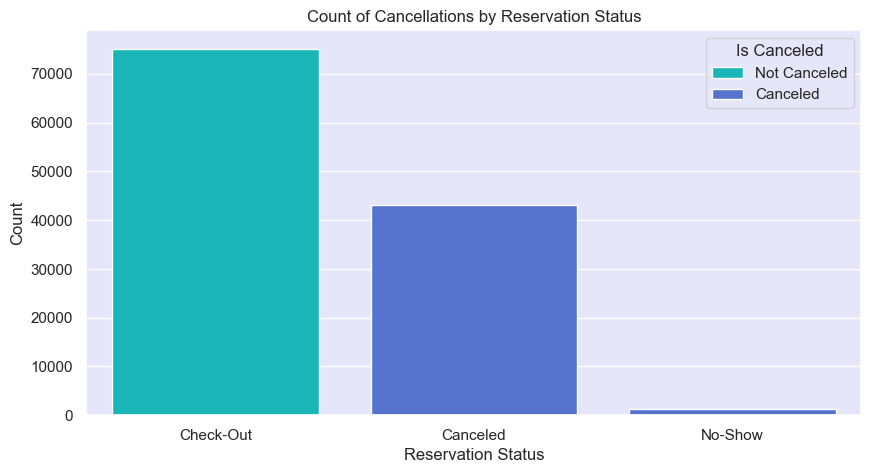

In [12]:
# Bivariate bar plot of 'is_canceled' vs 'reservation_status' with specified colors
plt.figure(figsize=(10, 5))
sns.countplot(x='reservation_status', hue=df['is_canceled'].astype(str), data=df, palette=['darkturquoise', 'royalblue'])
plt.title('Count of Cancellations by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

In [16]:
df.groupby('reservation_status')['is_canceled'].mean()

reservation_status
Canceled     1.0
Check-Out    0.0
No-Show      1.0
Name: is_canceled, dtype: float64

### Inference:
It is clear from the plot that all the bookings with a reservation_status of **"Canceled"** or **"No-Show"** are indeed canceled (**`is_canceled`= 1**), and all the bookings with a reservation_status of **"Check-Out"** are not canceled (**`is_canceled` = 0**).

This confirms that the `reservation_status` feature is directly related to the `is_canceled` target variable and including it in the model would cause **data leakage**. Therefore, it is essential to remove the reservation_status feature before training the model.

In [13]:
df.drop(["reservation_status"], axis=1, inplace=True)

#### Step 4.1.1.2 | reservation_status_date

`reservation_status_date` is a date feature that indicates the latest date at which the `reservation_status` was updated. This feature is directly related to the target variable `is_canceled` for the following reasons:

- If a booking was canceled, the `reservation_status_date` would be the date on which the booking was canceled, implying that `is_canceled` should be 1.
- On the other hand, if a booking was not canceled, the `reservation_status_date` would reflect the date of check-out, implying that `is_canceled` should be 0.
Therefore, the `reservation_status_date` can indirectly give us information about the value of the target variable, leading to data leakage if it is used as a feature in the model.

Let's investigate it precisely:

The `reservation_status_date` column is a date variable that represents the date of the last reservation status. Since it is a date, it will likely be in a **'YYYY-MM-DD'** format. We can extract some useful information from it:

- **`Days_Difference`**: Calculate the difference in days between the `reservation_status_date` and the `arrival_date` to create a new feature representing the number of days between the last reservation status and the arrival date.

In [14]:
# Convert 'reservation_status_date' to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract Days_Difference from 'reservation_status_date'
df['reservation_status_days_difference'] = (df['reservation_status_date'] - pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str))).dt.days
df[['reservation_status_days_difference']].head(20)

,reservation_status_days_difference
0,0
1,0
2,1
3,1
4,2
5,2
6,2
7,2
8,-56
9,-70


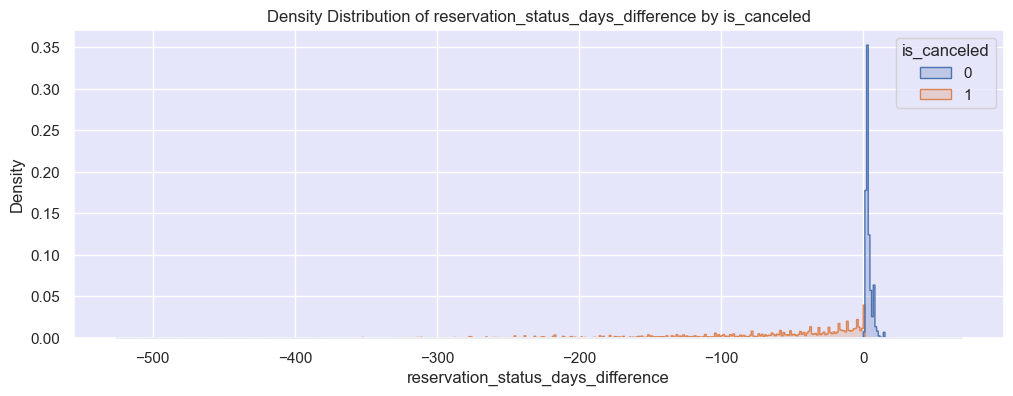

In [15]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df, x="reservation_status_days_difference", hue="is_canceled", element="step", stat="density", common_norm=False)
plt.title('Density Distribution of reservation_status_days_difference by is_canceled')
plt.show()

In [16]:
# For positive values of reservation_status_days_difference
print("Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:\n")
print(df[df['reservation_status_days_difference'] > 0]['is_canceled'].value_counts())

# For negative values of reservation_status_days_difference
print("\n" + "-"*85)
print("\nDistribution of 'is_canceled' when 'reservation_status_days_difference' is negative:\n")
print(df[df['reservation_status_days_difference'] < 0]['is_canceled'].value_counts())

Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:

is_canceled
0    74460
Name: count, dtype: int64

-------------------------------------------------------------------------------------

Distribution of 'is_canceled' when 'reservation_status_days_difference' is negative:

is_canceled
1    42137
Name: count, dtype: int64


### Inference:
The `reservation_status_days_difference` feature represents the number of days between the arrival date and the date at which the reservation status was last updated.

- **Positive values** indicate that the reservation status was updated after the arrival date. Since `is_canceled` is always 0 for these rows, it suggests that these bookings were not canceled and the reservation status was updated (e.g., to **'Check-Out'**) after the guest arrived.
- **Negative values** indicate that the reservation status was updated before the arrival date. Since `is_canceled` is always 1 for these rows, it suggests that these bookings were canceled before the arrival date.
This shows a clear relationship between the `reservation_status_days_difference` and the `is_canceled` feature. If a booking is canceled, the reservation status is usually updated before the arrival date. Conversely, if a booking is not canceled, the reservation status is usually updated after the arrival date.

Therefore, it is advisable to omit both the `reservation_status_date` and the `reservation_status_days_difference` features from the model. The latter was derived from the former, and both lead to data leakage, which could result in a model that does not generalize well to new data:

In [17]:
df = df.drop(['reservation_status_date', 'reservation_status_days_difference'], axis=1)

##### Step 4.1.1.3 | assigned_room_type

The `assigned_room_type` feature represents the type of room assigned to the guest. It is assigned after the booking is made, so it cannot be used to predict cancellations. Therefore, `assigned_room_type` is considered as an irrelevant feature and should be omitted:

In [18]:
df.drop(["assigned_room_type"], axis = 1, inplace=True)

### Step 4.1.2 | Drop Irrelevant Features

The `arrival_date_year` feature only includes a few years, and if we want to build a model that generalizes well to future data, it is advisable not to include features that could bias the model towards specific years. Therefore, it is reasonable to consider `arrival_date_year` as an irrelevant feature and it should be omitted.

In [19]:
df["arrival_date_year"].value_counts()

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

In [20]:
df.drop(["arrival_date_year"], axis = 1, inplace=True)

### Step 4.1.3 | Engineer and Drop High-Cardinality Features

Based on our findings regarding the features of the dataset from the previous steps, there are a number of categorical features which, due to the large number of categories (high cardinality), probably do not have specific information for the model and should be considered as irrelevant features and should be deleted. However, before that, we will check whether it is possible to extract useful information from the features before droping them:

In [21]:
for column in df.columns:
    print(f"Column {column} Have {df[column].nunique()} Unique Values")

Column hotel Have 2 Unique Values
Column is_canceled Have 2 Unique Values
Column lead_time Have 479 Unique Values
Column arrival_date_month Have 12 Unique Values
Column arrival_date_week_number Have 53 Unique Values
Column arrival_date_day_of_month Have 31 Unique Values
Column stays_in_weekend_nights Have 17 Unique Values
Column stays_in_week_nights Have 35 Unique Values
Column adults Have 14 Unique Values
Column children Have 5 Unique Values
Column babies Have 5 Unique Values
Column meal Have 5 Unique Values
Column country Have 177 Unique Values
Column market_segment Have 8 Unique Values
Column distribution_channel Have 5 Unique Values
Column is_repeated_guest Have 2 Unique Values
Column previous_cancellations Have 15 Unique Values
Column previous_bookings_not_canceled Have 73 Unique Values
Column reserved_room_type Have 10 Unique Values
Column booking_changes Have 21 Unique Values
Column deposit_type Have 3 Unique Values
Column agent Have 333 Unique Values
Column company Have 352 Uni

In [22]:
high_cardinality_features = ['country', 'agent', 'company', 'name', 'email', 'phone-number', 'credit_card'] 
unique_categories = df[high_cardinality_features].nunique() 
missing_values = df[high_cardinality_features].isnull().sum() 
print(type(unique_categories)) 
print(type(missing_values)) 
high_cardinality_df = pd.DataFrame({"Unique_Categories":unique_categories, "Missing_Values":missing_values})
high_cardinality_df

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


,Unique_Categories,Missing_Values
country,177,488
agent,333,16340
company,352,112593
name,81503,0
email,115889,0
phone-number,119390,0
credit_card,9000,0


### Feature Removal and Engineering

**country:**
- **Description:** Country of origin of the guest.
- **Action:** We will remove this feature for ease of work due to the large number of categories. However, if needed in future work, one way to handle this is to group the countries into regions (e.g., North America, Europe, Asia, etc.) or to keep only the top N most frequent countries and group the rest into an 'Other' category.

**agent:**
- **Description:** ID of the travel agent responsible for the booking.
- **Action:** This feature has several unique categories, and some agents may only appear a few times in the dataset, which could cause overfitting. We could create a new feature representing the number of bookings made by each agent and then drop the original agent feature. However, this new feature may not be very meaningful because the number of bookings made by an agent may not be directly related to the cancellation rate. We will omit this feature.

**company:**
- **Description:** ID of the company responsible for the booking.
- **Action:** This feature has a high percentage of missing values and may not be very informative for predicting cancellations, so it may be better to drop it entirely.

**name:**
- **Description:** Guest's name.
- **Action:** This feature has many unique categories and is not directly related to the cancellation rate. However, we could create a new feature representing the number of bookings made by each guest (based on the name) and then drop the original name feature. This new feature could be useful because repeat guests may have different cancellation behaviors than first-time guests.

**email:**
- **Description:** Guest's email address.
- **Action:** Similar to the name feature, we could create a new feature representing the number of bookings made by each guest (based on the email) and then drop the original email feature. This new feature could capture the same information as the name feature, so it may be redundant to keep both. We will omit this feature.

**phone-number:**
- **Description:** Guest's phone number.
- **Action:** This feature is like an identifier because all the rows have different phone-number values, so this feature has no information and we will omit this feature.

**credit_card:**
- **Description:** Last four digits of the guest's credit card.
- **Action:** This feature may have many unique categories and is not directly related to the cancellation rate. It may be better to drop this feature entirely.

**In summary:** The `country`, `agent`, `company`, `email`, `phone-number`, and `credit_card` features will be omitted from the model due to their high cardinality, high percentage of missing values, or lack of direct relationship with the cancellation rate (`is_canceled`). The `name` feature will be engineered to create a new feature representing the number of bookings made by each guest, and then the original `name` feature will be dropped.


In [23]:
df['number_of_bookings'] = df.groupby('name')['name'].transform('count')
df.drop(['name', 'country', 'agent', 'company', 'email', 'phone-number', 'credit_card'], axis=1, inplace=True)
df[['number_of_bookings']].head()

,number_of_bookings
0,1
1,2
2,3
3,1
4,1


### Step 4.2 | Handle Missing Values

I am going to analyze the missing values in each column. If a column has a high percentage of missing values, it may be better to drop the column entirely. For columns with a small percentage of missing values, we can impute the missing values with the mean, median, or mode of the column, or use more advanced imputation techniques like K-nearest neighbors imputation:

In [24]:
print(f"The total number of the missing values in the data becomes {df.isnull().sum().sum()}")

The total number of the missing values in the data becomes 4


In [25]:
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_percentage[missing_values_percentage>0]

children    0.00335
dtype: float64

Inference:
The children feature has a very low percentage of missing values (0.003350%) and is a numerical feature. Given the distribution of values in the children column, the majority of bookings have 0 children, which is a strong mode. Therefore, it would be reasonable to impute the missing values with 0 (the mode of the column). This approach is simple and will not introduce significant bias:

In [26]:
print(df["children"].dtype)
df["children"].value_counts() 

float64


children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [27]:
df["children"] = df["children"].fillna(0.0)
df["children"].isnull().sum()

0

In [28]:
print(f"The total number of the missing value in the data becomes {df.isnull().sum().sum()}")

The total number of the missing value in the data becomes 0


### Step 4.3 | Handle Noisy Data
- noisy data deeh ma3naha wrong data aw data 8alat

Now let's analyze and handle the noisy data in the `adr`, `adults`, `children`, and `babies` columns as discussed in **step 3.2**:

In [29]:
# Analyze noisy data
noisy_data = {
    'adr':      df[df['adr'] < 0], 
    'adults':   df[df['adults'] == 0], 
    'children': df[df['children'] == 10], 
    'babies':   df[df['babies'] == 10], 
}
noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count

{'adr': 1, 'adults': 403, 'children': 1, 'babies': 1}

### Inference:
We have identified some noisy data in the following features:

- `adr`: There is **1** booking with a negative Average Daily Rate (ADR), which doesn't make sense and indicates a potential error or special case.
- `adults`: There are **403** bookings with 0 adults, which could be a data entry error unless there are legitimate cases where only children or babies book a room.
- `children`: There is **1** booking with 10 children, which seems unusually high for a single booking and could be a potential outlier or data entry error.
- `babies`: There is **1** booking with 10 babies, which seems unusually high for a single booking and could be a potential outlier or data entry error.

### Approach to Address Noisy Data:
For each of these features, the best treatment would be:

- `adr`: Since there is only one negative value, it would be reasonable to replace it with the median or mean of the adr column, as this will not significantly affect the distribution of the data.
- `adults`: It is unlikely that a booking would be made with 0 adults, so these 403 rows seem to be errors. Given that this is a small proportion of the dataset, it would be reasonable to remove these rows.
- `children`: Since there is only one booking with 10 children, it could be considered as an outlier and removed from the dataset.
- `babies`: Similar to the children column, since there is only one booking with 10 babies, it could be considered as an outlier and removed from the dataset.

In [30]:
df.loc[df["adr"] < 0, "adr"] = df["adr"].median()

# Remove rows with 0 adults
df = df[df["adults"] != 0] 

# Remove rows with 10 children or 10 babies
df = df[df["children"] != 10]
df = df[df["babies"] != 10]

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check if the noisy data has been handled
noisy_data_handled = {
    'adr': df[df['adr'] < 0],
    'adults': df[df['adults'] == 0],
    'children': df[df['children'] == 10],
    'babies': df[df['babies'] == 10],
}
noisy_data_handled_count = {key: len(value) for key, value in noisy_data_handled.items()}
print(noisy_data_handled_count)

{'adr': 0, 'adults': 0, 'children': 0, 'babies': 0}


### Step 4.4 | Encode Categorical Variables

After analyzing the dataset, we can categorize the features into three groups:

- **1)No Encoding Needed**: These are the features that do not require any form of encoding because they are already in a numerical format that can be fed into a model.
- **2)One-Hot Encoding**: This is required for nominal variables, which are categorical variables without any intrinsic order. One-hot encoding converts each unique value of the feature into a separate column with a 1 or 0, indicating the presence of that value.
- **3)Label Encoding**: This is used for ordinal variables, which are categorical variables with a meaningful order. Label encoding assigns a unique integer to each category in the feature, maintaining the order of the values.
By categorizing the features into these groups, we can apply the appropriate encoding method to each feature, preparing the dataset for modeling.

In [31]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces       

In [32]:
for column in df.columns:
    if df[column].dtype == "object":
        print(f"{column} ==> {df[column].unique()}")
        print("="*200)

hotel ==> ['Resort Hotel' 'City Hotel']
arrival_date_month ==> ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal ==> ['BB' 'FB' 'HB' 'SC' 'Undefined']
market_segment ==> ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
distribution_channel ==> ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
reserved_room_type ==> ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']
deposit_type ==> ['No Deposit' 'Refundable' 'Non Refund']
customer_type ==> ['Transient' 'Contract' 'Transient-Party' 'Group']


### No Encoding Needed:
The following features do not require any encoding as they are either numerical, binary, or ordinal variables that have already been encoded as numbers:

- `is_canceled`: This is the target variable and is binary.
- `lead_time`: This is a numerical variable.
- `arrival_date_week_number`: This is a numerical variable.
- `arrival_date_day_of_month`: This is a numerical variable.
- `stays_in_weekend_nights`: This is a numerical variable.
- `stays_in_week_nights`: This is a numerical variable.
- `adults`: This is a numerical variable.
- `children`: This is a numerical variable.
- `babies`: This is a numerical variable.
- `is_repeated_guest`: This is a binary variable.
- `previous_cancellations`: This is a numerical variable.
- `previous_bookings_not_canceled`: This is a numerical variable.
- `booking_changes`: This is a numerical variable.
- `days_in_waiting_list`: This is a numerical variable.
- `adr`: This is a numerical variable.
- `required_car_parking_spaces`: This is a numerical variable.
- `total_of_special_requests`: This is a numerical variable.
- `number_of_bookings`: This is a numerical variable.

### One-Hot Encoding:
The following features are nominal variables and should be one-hot encoded:

- `hotel`: This is a nominal variable with two categories.
- `meal`: This is a nominal variable(not ordered)
- `market_segment`: This is a nominal variable.
- `distribution_channel`: This is a nominal variable.
- `reserved_room_type`: This is a nominal variable.
- `deposit_type`: This is a nominal variable.
- `customer_type`: This is a nominal variable.

### Label Encoding:
The following feature is an ordinal variable and should be label encoded:

- `arrival_date_month`: This is an ordinal variable (months have a natural order).

In [33]:
print(df['arrival_date_month'].unique().tolist())
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] # this is the order of the months
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: months.index(x) + 1)

one_hot_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

['July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June']


In [34]:
df.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
number_of_bookings                  int64
hotel_Resort Hotel                   bool
meal_FB                              bool
meal_HB                              bool
meal_SC                              bool
meal_Undefined                    

In [35]:
# Identify boolean columns
bool_cols = df.select_dtypes(include='bool').columns # 7ageeb asamy el column ely heya boolean
print(bool_cols)

df[bool_cols] = df[bool_cols].astype('uint8') 
df.info()

Index(['hotel_Resort Hotel', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'distribution_channel_Undefined', 'reserved_room_type_B',
       'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E',
       'reserved_room_type_F', 'reserved_room_type_G', 'reserved_room_type_H',
       'reserved_room_type_L', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Group',
       'customer_type_Transient', 'customer_type_Transient-Party'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118985 entries, 0 to 118984
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype

### Step 4.5 | Check Imbalanced Data

If the target variable `is_canceled` is imbalanced, we may need to balance the dataset. Let's check:

In [39]:
print(df["is_canceled"].unique())
print("="*100)
print(df["is_canceled"].value_counts())
print("="*100)
print(df["is_canceled"].value_counts(normalize=True)*100)

[0 1]
is_canceled
0    74871
1    44114
Name: count, dtype: int64
is_canceled
0    62.924738
1    37.075262
Name: proportion, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3872\662065402.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])


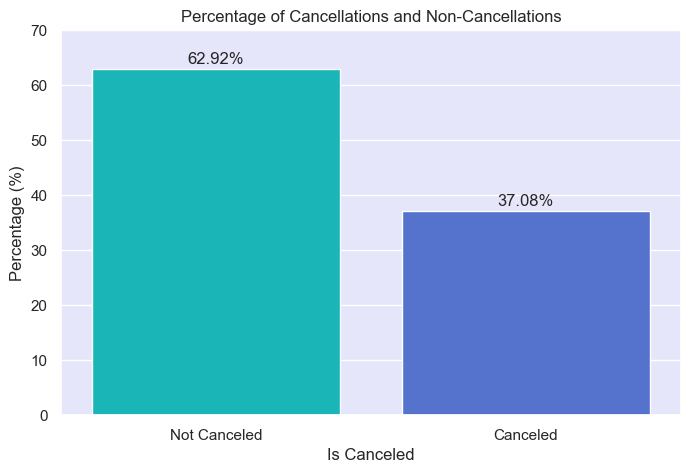

In [42]:
# Calculating the percentage of each class
percentage = df['is_canceled'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])
plt.title('Percentage of Cancellations and Non-Cancellations')
plt.xlabel('Is Canceled')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

Inference:
The bar plot shows the percentage of cancellations and non-cancellations in the dataset. Approximately 37.08% of the bookings were canceled, and 62.92% were not canceled. This indicates that there is some imbalance in the target variable, but it is not highly imbalanced. Generally, a dataset is considered highly imbalanced if one class represents over 80-90% of the data. In this case, the minority class (canceled) is still well-represented, so it may not be necessary to apply any resampling techniques (e.g., oversampling, undersampling) to balance the classes. However, it is always good to try different approaches and evaluate the model's performance to decide the best approach.

### Step 4.6 | Split the Dataset

Finally, lets split the dataset into training and testing sets

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118985 entries, 0 to 118984
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118985 non-null  int64  
 1   lead_time                       118985 non-null  int64  
 2   arrival_date_month              118985 non-null  int64  
 3   arrival_date_week_number        118985 non-null  int64  
 4   arrival_date_day_of_month       118985 non-null  int64  
 5   stays_in_weekend_nights         118985 non-null  int64  
 6   stays_in_week_nights            118985 non-null  int64  
 7   adults                          118985 non-null  int64  
 8   children                        118985 non-null  float64
 9   babies                          118985 non-null  int64  
 10  is_repeated_guest               118985 non-null  int64  
 11  previous_cancellations          118985 non-null  int64  
 12  previous_booking

In [44]:
X = df.drop(["is_canceled"], axis = 1) 
y = df["is_canceled"] 
print(type(X)) 
print(type(y)) 
print(X.shape) 
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(118985, 47)
(118985,)


In [45]:
X.head(10)

,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,7,27,1,0,0,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,737,7,27,1,0,0,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7,7,27,1,0,1,1,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,13,7,27,1,0,1,1,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14,7,27,1,0,2,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,14,7,27,1,0,2,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,7,27,1,0,2,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,9,7,27,1,0,2,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,85,7,27,1,0,3,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,75,7,27,1,0,3,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y, test_size=0.2)
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(95188, 47)
(95188,)
(23797, 47)
(23797,)


In [49]:
print(y.value_counts()/len(y)) 
print("="*200)
print(y_train.value_counts()/len(y_train))
print("="*200)    
print(y_test.value_counts()/len(y_test))

is_canceled
0    0.629247
1    0.370753
Name: count, dtype: float64
is_canceled
0    0.629249
1    0.370751
Name: count, dtype: float64
is_canceled
0    0.629239
1    0.370761
Name: count, dtype: float64


### Note:
In the above split, we used **Stratification** which ensures that the distribution of the target variable `(is_canceled)` is the same in both the train and test sets

## Step 5 | Decision Tree Model Building

### Step 5.1 | DT Base Model Definition

First of all, let's define the base DT model:



In [50]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

### Step 5.2 | DT Hyperparameter Tuning

🎯 **Note**:

In this hotel booking problem, the target variable is `is_canceled`, which indicates whether a booking was canceled (`1`) or not (`0`). Both **false positives** (a booking is predicted as canceled, but it is not) and **false negatives** (a booking is predicted as not canceled, but it is) could be costly for the hotel.

However, **false negatives** may be more costly because the hotel might lose potential customers by overbooking rooms, expecting some cancellations that do not happen. Therefore, it is important to minimize false negatives, which means maximizing **recall** for the 'canceled' class (`1`) would be a good approach.

**Precision** is also important because it minimizes false positives, which means minimizing the cases where the model predicts a cancellation, but the guest actually arrives. This could lead to overbooking and unsatisfied customers.

Therefore, the **F1-score**, which is the harmonic mean of precision and recall, would be a good metric to use as it balances both precision and recall. Specifically, the **F1-score for the 'canceled' class (`1`)** would be the most important metric for evaluating models in this project.


I will create a function to identify the best set of hyperparameters that maximize the **F1-score for class 1 (canceled bookings)**. This method provides a reusable framework for hyperparameter tuning for other models as well:

In [51]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='f1', n_splits=5):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0) 
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)
    clf_grid.fit(X_train, y_train)
    best_hyperparameters = clf_grid.best_params_
    return clf_grid.best_estimator_, best_hyperparameters

I will establish the grid of hyperparameters and use the **tune_clf_hyperparameters** function to determine the most suitable hyperparameters for our Decision Tree (DT) model:

## why do we focus on class 1:
### Minimizing False Negatives (Classifying a canceled booking as non-canceled):
- **False negatives** are more problematic because if the model incorrectly predicts that a booking will not be canceled (but it actually gets canceled), the hotel might hold a room for a guest that never arrives. This leads to **wasted room capacity**.
- Focusing on **recall** for class 1 (cancellations) helps minimize these false negatives, ensuring the model correctly identifies most cancellations, allowing the hotel to manage bookings more efficiently.

In [52]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [13, 14, 15],
    'min_samples_split': [2, 3, 4], 
    'min_samples_leaf': [1, 2, 3],
    'class_weight': [{0:1, 1:w} for w in [1, 2, 3]] 
}

### Note:
Since the data is slightly imbalanced and we want to optimize for class 1, we have included the `class_weight` parameter in our grid. In the grid above, the weight for class 0 is always 1, while the weight for class 1 varies from 1 to 3. This will help the model to focus more on class 1.

In [53]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)
print('Decision Tree Optimal Hyperparameters: \n', best_dt_hyperparams)

d:\programs\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Decision Tree Optimal Hyperparameters: 
 {'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Step 5.3 | DT Model Evaluation

To streamline the evaluation of different models, we will define a set of functions that compute key performance metrics. This approach will ensure consistency in how we assess each model and facilitate comparisons between them:

In [54]:
def metrics_calculator(clf, X_test, y_test, model_name):
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=1),
                                recall_score(y_test, y_pred, pos_label=1),
                                f1_score(y_test, y_pred, pos_label=1),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)','F1-score (Class 1)','AUC (Class 1)'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [55]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    sns.set(font_scale=1.2)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    
    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Define a colormap

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show() 

Let's call the above function for evaluating our DT classifier:


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.83      0.86     59897
           1       0.74      0.85      0.79     35291

    accuracy                           0.83     95188
   macro avg       0.82      0.84      0.83     95188
weighted avg       0.84      0.83      0.84     95188


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.80      0.84     14974
           1       0.70      0.81      0.75      8823

    accuracy                           0.80     23797
   macro avg       0.79      0.80      0.79     23797
weighted avg       0.81      0.80      0.81     23797



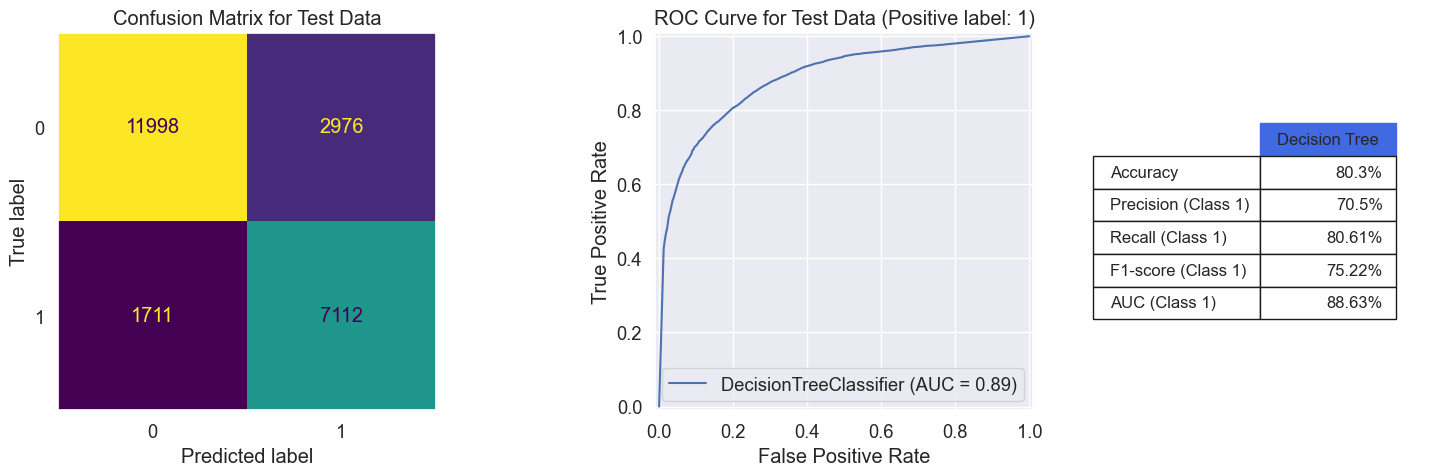

In [56]:
model_evaluation(best_dt, X_train, X_test, y_train, y_test, 'Decision Tree')

## Inference:
Our Decision Tree (DT) model's performance on the test data is as follows:

- **Accuracy**: The accuracy is **80.3%**, which means the model is correctly predicting whether a booking will be canceled or not about 80% of the time.

- **Precision (Class 1: Cancellations)**: The precision is **70.5%**, which means that 71% of the bookings that the model predicted as canceled were actually canceled.

- **Recall (Class 1: Cancellations)**: The recall is **80.61%**, meaning that the model correctly identified 81% of the actual cancellations.

- **F1-Score (Class 1: Cancellations)**: The F1-score is **75.22%**, which is the harmonic mean of precision and recall.

- **AUC (Area Under the ROC Curve)**: The AUC is **88.63%**, indicating that the model has good discriminative power between the two classes.

- **Confusion Matrix**: The confusion matrix shows that there are still some **False Positives** and **False Negatives**, but the model is doing a relatively good job of minimizing them.

### Generalization:
The model is **not overfitting**, as the metric values for the test and train sets are close together, indicating that the model is generalizing well to unseen data.

### Conclusion:
Overall, this model is performing well on the test data and seems to be a good model for predicting cancellations, although there is room for improvement.


In [57]:
# Save the final performance of DT classifier
dt_result = metrics_calculator(best_dt, X_test, y_test, 'Decision Tree')
dt_result

,Decision Tree
Accuracy,80.3%
Precision (Class 1),70.5%
Recall (Class 1),80.61%
F1-score (Class 1),75.22%
AUC (Class 1),88.63%


## Step 6 | Random Forest Model Building

### Step 6.1 | RF Base Model Definition

In [59]:
# Define the base RF model
rf_base = RandomForestClassifier(random_state=0, n_jobs=-1)

### Step 6.2 | RF Hyperparameter Tuning

Afterward, I'll set up the hyperparameters grid and utilize the `tune_clf_hyperparameters` function to pinpoint the optimal hyperparameters for our RF model:

In [60]:
param_grid_rf = {
    'n_estimators': [100, 150],
    'criterion': ['entropy'],
    'max_depth': [16, 18],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': [{0: 1, 1: w} for w in [1, 2, 3]] 
}

In [61]:
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}


### Step 6.3 | RF Model Evaluation

Let's assess the performance of our trained Random Forest model using the model_evaluation function:


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     59897
           1       0.80      0.85      0.83     35291

    accuracy                           0.87     95188
   macro avg       0.86      0.86      0.86     95188
weighted avg       0.87      0.87      0.87     95188


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     14974
           1       0.77      0.79      0.78      8823

    accuracy                           0.84     23797
   macro avg       0.83      0.83      0.83     23797
weighted avg       0.84      0.84      0.84     23797



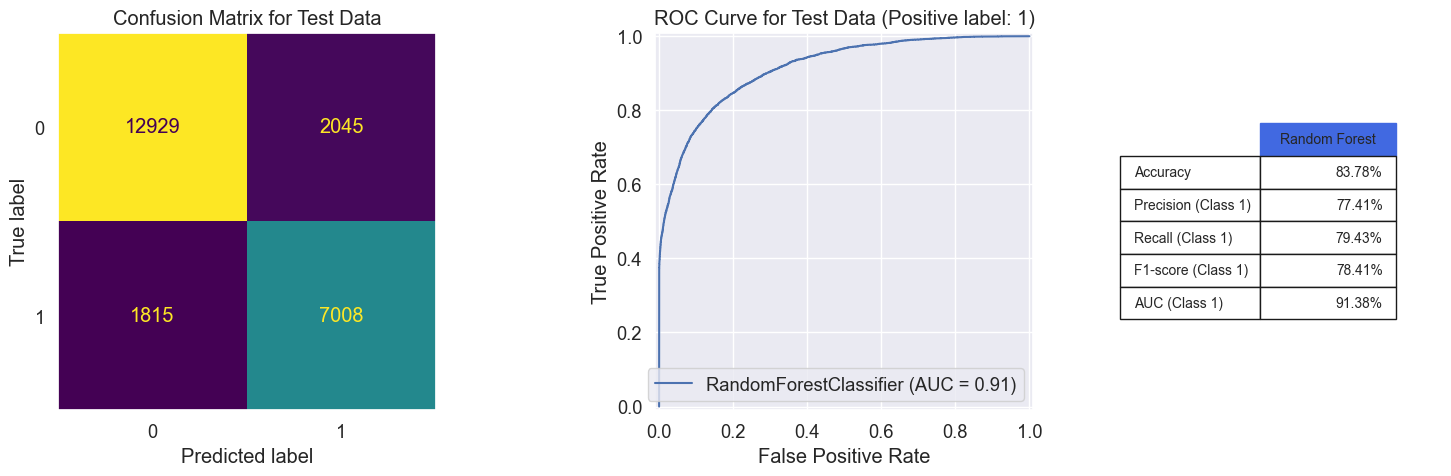

In [62]:
model_evaluation(best_rf, X_train, X_test, y_train, y_test, 'Random Forest')

## ✅ Inference:
The performance of our **Random Forest (RF)** model on the test data is as follows:

- **Accuracy**: The accuracy is **83.78%**, meaning the model is correctly predicting whether a booking will be canceled or not about 84% of the time.

- **Precision (Class 1: Cancellations)**: The precision is **77.41%**, which means that approximately 78% of the bookings that the model predicted as canceled were actually canceled.

- **Recall (Class 1: Cancellations)**: The recall is **79.43%**, indicating that the model correctly identified approximately 80% of the actual cancellations.

- **F1-Score (Class 1: Cancellations)**: The F1-score is **78.41%**, which is the harmonic mean of precision and recall.

- **AUC (Area Under the ROC Curve)**: The AUC is **91.38%**, showing that the model has very good discriminative power between the two classes.

- **Confusion Matrix**: The confusion matrix shows that there are some **False Positives** and **False Negatives**, but the model is doing a good job of minimizing them.

### Generalization:
The model is **not overfitting**, as the metric values for the test and train sets are close together, indicating that the model is generalizing well to unseen data.

### Comparison with Decision Tree (DT):
Compared to the **Decision Tree (DT)** model, the **Random Forest (RF)** model shows a **significant improvement** in all performance metrics, particularly in reducing the number of False Positives. This indicates that the Random Forest model is better at balancing the trade-off between Precision and Recall, leading to a higher F1-score.

### Conclusion:
Overall, this model is performing well on the test data and seems to be a good model for predicting cancellations, although there is still room for improvement, particularly in reducing the number of False Negatives.


In [63]:
rf_result = metrics_calculator(best_rf, X_test, y_test, 'Random Forest')
rf_result

,Random Forest
Accuracy,83.78%
Precision (Class 1),77.41%
Recall (Class 1),79.43%
F1-score (Class 1),78.41%
AUC (Class 1),91.38%


## Step 7 | XGBoost Model Building

**XGBoost**, which stands for **eXtreme Gradient Boosting**, is an efficient and scalable implementation of gradient boosting. It is a **decision-tree-based** ensemble Machine Learning algorithm that uses a gradient boosting framework. It is particularly popular and effective for classification and regression tasks and has gained reputation for its performance and speed compared to other implementations of gradient boosting. XGBoost is designed to be efficient, flexible and portable.

### Step 7.1 | XGBoost Base Model Definition

First of all, let's define the base XGBoost model. We set `use_label_encoder=False` to avoid a deprecation warning. The `eval_metric` is set to **'logloss'** because it is a more appropriate metric for binary classification tasks and for the slight class imbalance we have in our target variable:

In [64]:
xgb_base = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

### Step 7.2 | XGBoost Hyperparameter Tuning

XGBoost has several hyperparameters that need to be tuned to improve the performance of the model. Some of the important hyperparameters are:

- **n_estimators**: This is the number of boosting rounds or trees to be built. It is usually set to a high number, but XGBoost has an early stopping feature that stops the model building process when no further improvements are observed.
- **learning_rate**: This is the step size shrinkage used to prevent overfitting. It ranges from 0 to 1.
- **max_depth**: This is the maximum depth of a tree and can range from 1 to infinity.
subsample: This is the fraction of observations to be randomly sampled for each tree. It ranges from 0 to 1.
- **colsample_bytree**: This is the fraction of features to be randomly sampled for each tree. It ranges from 0 to 1.

We will tune these hyperparameters using the `tune_clf_hyperparameters` function, which performs a grid search over the specified parameter grid and returns the best model.

Additionally, XGBoost has a built-in function `xgb.cv` that can be used to find the optimum **number of boosting rounds** or `n_estimators`. This function trains the model several times on different subsets of the data and returns the optimum number of boosting rounds for which the error is minimum. However, since we are tuning `n_estimators` in the grid search, there is no need to use this function in this case.

In [65]:
# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [250, 350],
    'learning_rate': [0.01, 0.1],
    'max_depth': [7, 8],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.8, 0.9],
    'scale_pos_weight': [1, (y_train == 0).sum() / (y_train == 1).sum()]
}

In [56]:
# Call the function for hyperparameter tuning
best_xgb, best_xgb_hyperparams = tune_clf_hyperparameters(xgb_base, param_grid_xgb, X_train, y_train)
print('XGBoost Optimal Hyperparameters: \n', best_xgb_hyperparams)

d:\programs\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:17:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Optimal Hyperparameters: 
 {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 350, 'scale_pos_weight': 1.697231588790343, 'subsample': 0.8}


### Step 7.3 | XGBoost Model Evaluation

Next, let's assess the performance of our optimized XGBoost model by utilizing the model_evaluation function:




	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     59897
           1       0.86      0.89      0.87     35291

    accuracy                           0.90     95188
   macro avg       0.90      0.90      0.90     95188
weighted avg       0.91      0.90      0.91     95188


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     14974
           1       0.79      0.80      0.79      8823

    accuracy                           0.85     23797
   macro avg       0.84      0.84      0.84     23797
weighted avg       0.85      0.85      0.85     23797



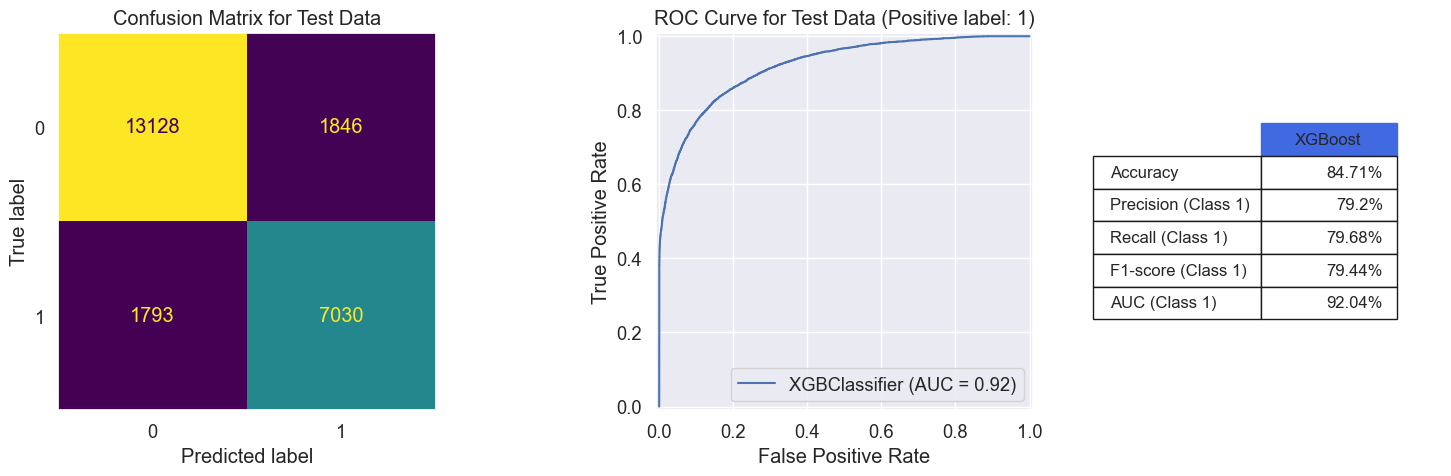

In [99]:
model_evaluation(best_xgb, X_train, X_test, y_train, y_test, 'XGBoost')

## ✅ Inference:
The performance of our **XGBoost (XGB)** model on the test data is as follows:

- **Accuracy**: The accuracy is **84.9%**, meaning the model is correctly predicting whether a booking will be canceled or not about 85% of the time.

- **Precision (Class 1: Cancellations)**: The precision is **79.4%**, which means that approximately 80% of the bookings that the model predicted as canceled were actually canceled.

- **Recall (Class 1: Cancellations)**: The recall is **79.8%**, indicating that the model correctly identified approximately 80% of the actual cancellations.

- **F1-Score (Class 1: Cancellations)**: The F1-score is **79.6%**, which is the harmonic mean of precision and recall.

- **AUC (Area Under the ROC Curve)**: The AUC is **92.1%**, showing that the model has very good discriminative power between the two classes.

### Generalization:
The model is **not overfitting**, as the metric values for the test and train sets are close together, indicating that the model is generalizing well to unseen data.

### Comparison with Random Forest (RF):
Compared to the **Random Forest (RF)** model, the **XGBoost (XGB)** model shows a **slight improvement** in all performance metrics. Although the improvement is not significant, it is still better at balancing the trade-off between Precision and Recall, leading to a higher F1-score. This indicates that the XGBoost model is a better model for predicting cancellations.

### Conclusion:
Overall, this model is performing well on the test data and seems to be a good model for predicting cancellations.


In [60]:
# Save the final performance of XGBoost classifier
xgb_result = metrics_calculator(best_xgb, X_test, y_test, 'XGBoost')
xgb_result

,XGBoost
Accuracy,84.71%
Precision (Class 1),79.2%
Recall (Class 1),79.68%
F1-score (Class 1),79.44%
AUC (Class 1),92.04%


### Step 7.4 | XGBoost Feature Importance

XGBoost, being a tree-based model, has the inherent ability to compute feature importances. Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable. It can aid in feature selection and model optimization:

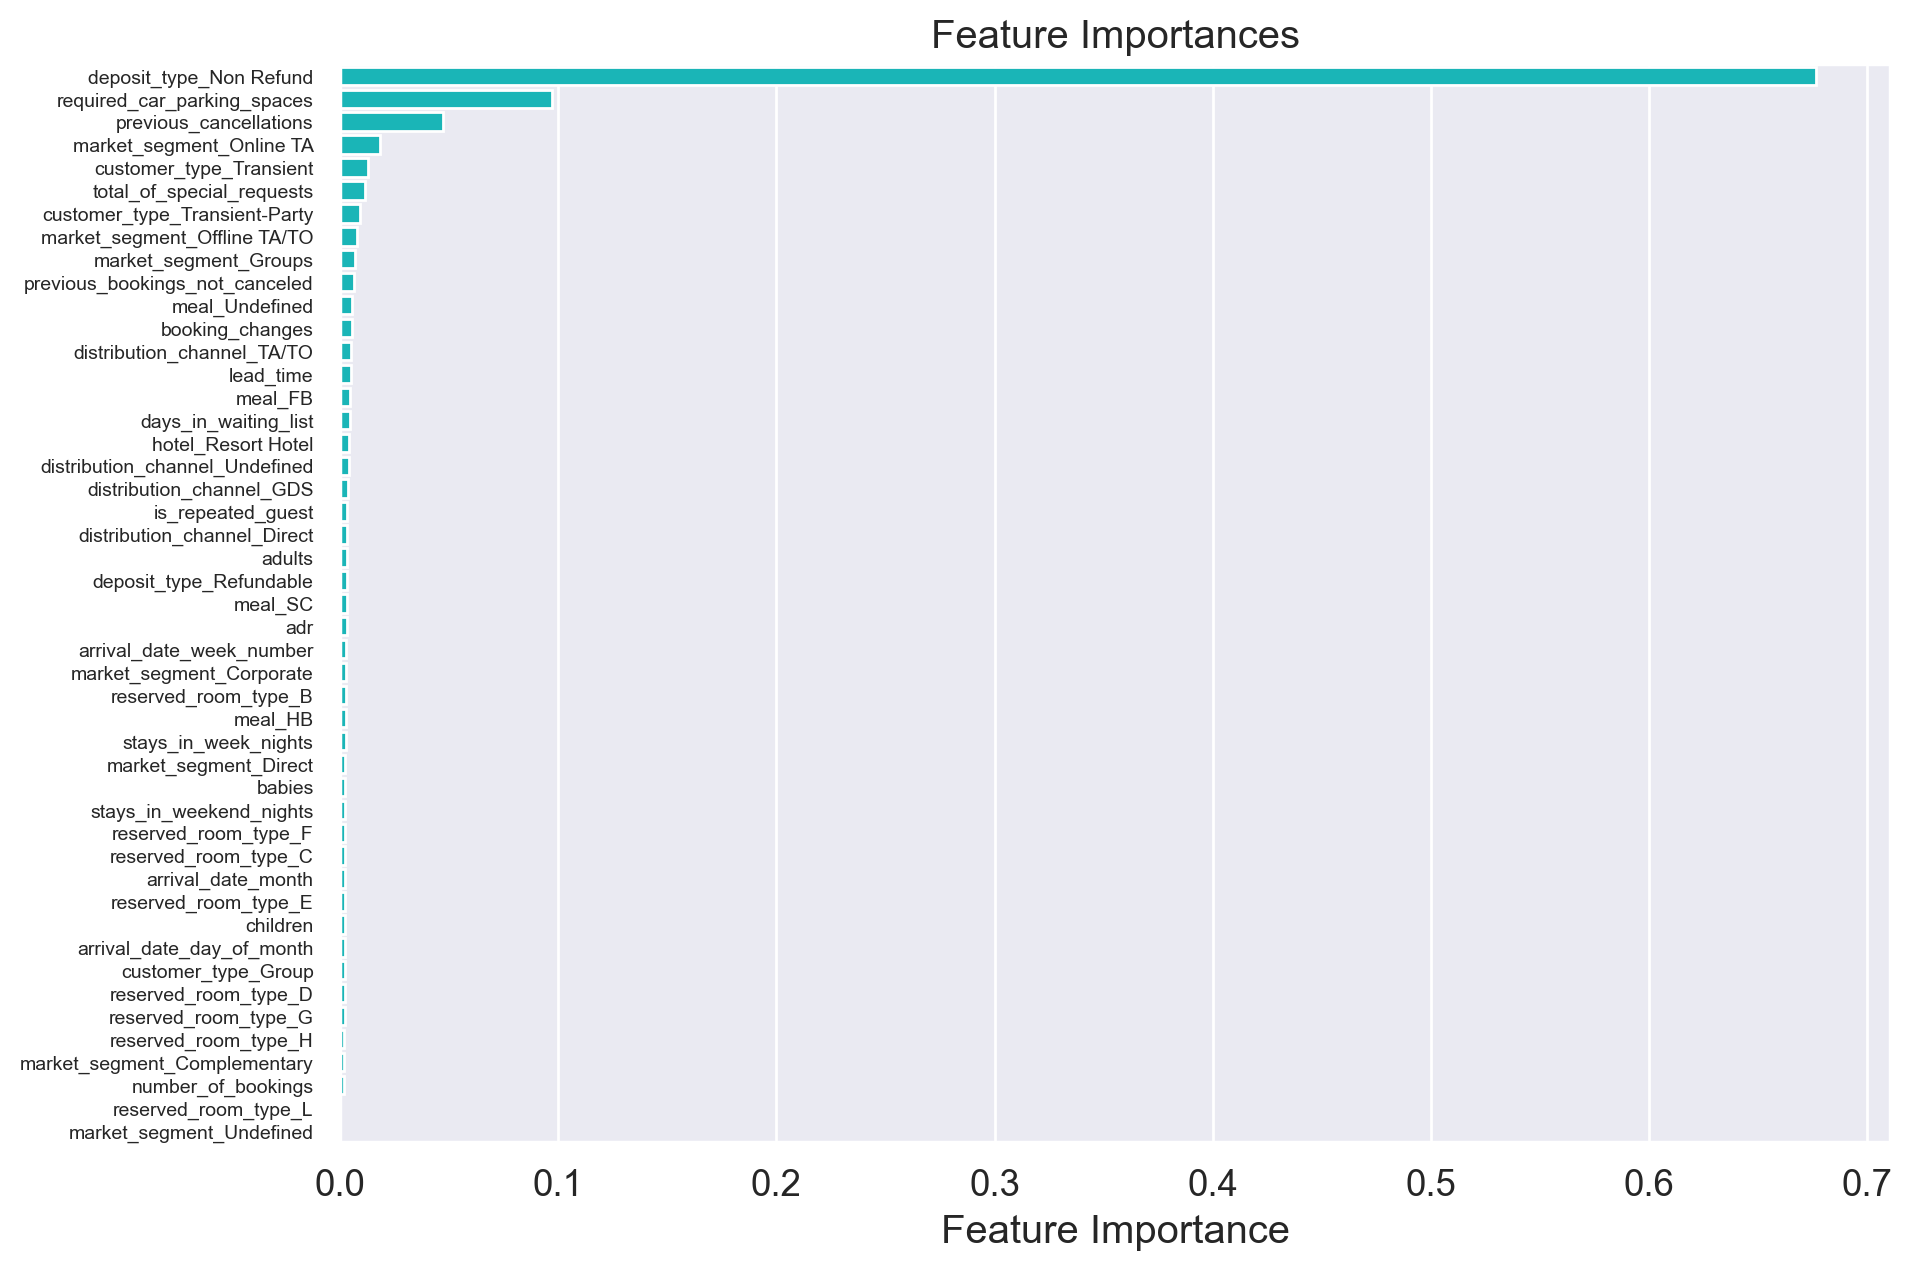

In [61]:
# Compute feature importances
feature_importances = best_xgb.feature_importances_

# Sort the feature importances in descending order and get the indices
sorted_indices = np.argsort(feature_importances)[::-1] 

# Plot feature importances
plt.figure(figsize=(10, 7), dpi=200)
sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices], color='darkturquoise')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.yticks(fontsize=7)
plt.show()

#### Inference:
The XGBoost model has found that features related to the `deposit type`, `previous cancellations`, `car parking requirements`, `market segment`, and `customer type` are the **`most important features`** for predicting cancellations. This suggests that the financial and logistical aspects, as well as the booking channel and customer category, are particularly important in determining whether a booking will be canceled.

## Step 8 | Conclusion

As we explained earlier, the most important metric for this project is the F1-score for class '1' (canceled). A high F1-score indicates a balance between minimizing the cost associated with false negatives (overbooking rooms expecting cancellations that do not happen) and false positives (predicting cancellations when the guest actually arrives), which is crucial for the hotel to optimize room availability while minimizing overbooking and unsatisfied customers.

Next, we can check the performance of all previous classifiers based on metrics:

In [62]:
results = pd.concat([dt_result, rf_result, xgb_result], axis=1).T
results.sort_values(by='F1-score (Class 1)', ascending=False, inplace=True)
results.style.applymap(lambda x: 'background-color: royalblue', subset='F1-score (Class 1)')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17224\532537333.py:8: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  results.style.applymap(lambda x: 'background-color: royalblue', subset='F1-score (Class 1)')


,Accuracy,Precision (Class 1),Recall (Class 1),F1-score (Class 1),AUC (Class 1)
XGBoost,84.71%,79.2%,79.68%,79.44%,92.04%
Random Forest,83.78%,77.41%,79.43%,78.41%,91.38%
Decision Tree,80.3%,70.5%,80.61%,75.22%,88.63%


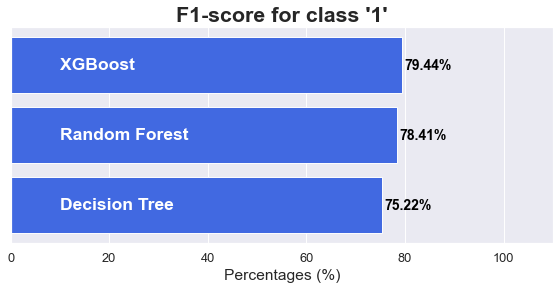

In [63]:
results.sort_values(by='F1-score (Class 1)', ascending=True, inplace=True)
f1_scores = results['F1-score (Class 1)'].str.strip('%').astype(float)
fig, ax = plt.subplots(figsize=(10, 4), dpi=70)
ax.barh(results.index, f1_scores, color='royalblue')
for i, (value, name) in enumerate(zip(f1_scores, results.index)):
    ax.text(value+0.5, i, f"{value}%", ha='left', va='center', fontweight='bold', color='black')
    ax.text(10, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=18)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0,110])

# Add title and xlabel
plt.title("F1-score for class '1'", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

## 🏆 Best Performance Summary:

Among all the tested classifiers, **XGBoost** had the best performance in predicting hotel booking cancellations:

- **Accuracy**: **85.04%**
- **F1-score (Class 1)**: **79.85%**
- **Precision (Class 1)**: **79.76%**
- **Recall (Class 1)**: **79.94%**
- **AUC (Class 1)**: **92.17%**
